## Stock Price Technical Analysis & Financial Metrics for NVDA
1. Introduction & Setup
Objective: This analysis aims to evaluate historical stock price trends using quantitative technical indicators and financial metrics. We will utilize TA-Lib for signal generation (RSI, MACD) and PyNance for risk metrics.

In [1]:
import os
import sys
import warnings
import pandas as pd
import yfinance as yf  # Helper to fetch fresh data if CSV is missing

# Add 'scripts' directory to path to allow importing custom modules
sys.path.insert(0, os.path.dirname(os.getcwd()))

# Import Custom Scripts
from scripts.data_loader import DataLoader
from scripts.stock_analysis import TechnicalAnalyzer, StockVisualizer

# Configuration
warnings.filterwarnings('ignore')
DATA_PATH = '../data/yfinance_data/NVDA.csv'
TICKER = 'NVDA'

print("✅ Libraries and Custom Scripts Loaded.")

✅ Libraries and Custom Scripts Loaded.


#### 2. Data Loading and Preparation
We use the DataLoader class to get the raw stock data. Since technical analysis requires specific columns (Open, High, Low, Close, Volume), we ensure the data is formatted correctly.


In [2]:

# Ensure the file exists
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"❌ Data file not found at: {DATA_PATH}")

# Use your existing loader
loader = DataLoader()
stock_df = loader.load_data(DATA_PATH)

# Verify OHLCV data loaded correctly
print(f"Loaded Data Shape: {stock_df.shape}")
print(stock_df.head())


Loaded Data Shape: (3774, 6)
         Date     Close      High       Low      Open      Volume
0  2009-01-02  0.199652  0.201027  0.184294  0.184982   497124000
1  2009-01-05  0.203319  0.207904  0.195984  0.197360   705736000
2  2009-01-06  0.210196  0.216156  0.204695  0.209279   657904000
3  2009-01-07  0.197589  0.205382  0.190483  0.205382   870096000
4  2009-01-08  0.192546  0.195067  0.180626  0.195067  1014496000


### 3. Technical Analysis with TA-Lib
In this section, we initialize the TechnicalAnalyzer class. This encapsulates the logic for applying complex mathematical indicators to the dataframe.

Indicators Applied:

SMA (Simple Moving Average): We calculate the 20-day (short-term) and 50-day (medium-term) averages to identify trend direction.

RSI (Relative Strength Index): Measures momentum to identify overbought (>70) or oversold (<30) conditions.

MACD (Moving Average Convergence Divergence): A trend-following momentum indicator that shows the relationship between two moving averages of a stock's price.

In [3]:
# Initialize the analyzer with the dataframe
analyzer = TechnicalAnalyzer(stock_df)

# Apply the indicators (SMA, RSI, MACD)
# This modifies the internal dataframe and returns the result
df_analyzed = analyzer.apply_talib_indicators()

# Preview the new technical columns
cols_to_show = ['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD']
print(df_analyzed[cols_to_show].tail())

[INFO] Calculating TA-Lib technical indicators...
[INFO] Indicators added: SMA_20, SMA_50, RSI, MACD components.
                Close     SMA_20     SMA_50        RSI      MACD
Date                                                            
2023-12-22  48.805527  47.706983  46.257777  55.352119  0.634352
2023-12-26  49.254299  47.759019  46.334178  57.245971  0.655689
2023-12-27  49.392231  47.838989  46.400666  57.837928  0.675937
2023-12-28  49.497185  47.908266  46.512367  58.310919  0.692470
2023-12-29  49.497185  48.046003  46.658888  58.310919  0.697532


### 4. Financial Metrics with PyNance
We move beyond price trends to analyze risk and return using PyNance. This library is specialized for retrieving and analyzing financial data.

Metrics Calculated:

Volatility: The degree of variation of a trading price series over time.

Sharpe Ratio: The average return earned in excess of the risk-free rate per unit of volatility (a measure of risk-adjusted return).

In [4]:
# Calculate key financial metrics
financial_metrics = analyzer.calculate_financial_metrics()

# ===========================
# Manual Financial Metrics 
# ===========================
print("Financial Metrics Summary")
print("-" * 50)
print(f"Volatility (Annualized): {financial_metrics['volatility']:.2f}%")
print(f"Sharpe Ratio: {financial_metrics['sharpe_ratio']:.2f}")
print(f"Maximum Drawdown: {financial_metrics['max_drawdown']:.2%}")
print("\n")


# ===========================
# PyNance Portfolio Optimizer Results
# ===========================
print("PyNance Portfolio Optimizer Summary")
print("-" * 50)

# ---- Max Sharpe Portfolio ----
print("\n=== Max Sharpe Portfolio (Risk/Return) ===")
print(financial_metrics["max_sharpe_rr"])

print("\n=== Max Sharpe Portfolio Weights ===")
print(financial_metrics["max_sharpe_weights"])

# ---- Minimum Variance Portfolio ----
print("\n=== Minimum Variance Portfolio (Risk/Return) ===")
print(financial_metrics["min_var_rr"])

print("\n=== Minimum Variance Portfolio Weights ===")
print(financial_metrics["min_var_weights"])
print("\n" + "-" * 50)


[INFO] Running PyNance portfolio optimizer calculations...
[INFO] PyNance portfolio optimizer metrics added.
Financial Metrics Summary
--------------------------------------------------
Volatility (Annualized): 0.46%
Sharpe Ratio: 1.03
Maximum Drawdown: -66.34%


PyNance Portfolio Optimizer Summary
--------------------------------------------------

=== Max Sharpe Portfolio (Risk/Return) ===
                   Max Sharpe Portfolio
Expected Return                  81.98%
Standard Deviation               46.37%

=== Max Sharpe Portfolio Weights ===
     Portfolio Weight
AAPL           12.31%
MSFT            0.00%
META            0.00%
NVDA           87.69%
TSLA            0.00%

=== Minimum Variance Portfolio (Risk/Return) ===
                   Min Var Portfolio
Expected Return               20.48%
Standard Deviation            20.27%

=== Minimum Variance Portfolio Weights ===
     Portfolio Weight
AAPL           42.17%
MSFT           56.13%
META            1.69%
NVDA            0.00%


### 5. Visualization
Finally, we use the StockVisualizer class to interpret the data visually. Charts are essential for spotting entry/exit points that raw numbers might miss.

#### A. Price Trend & Moving Averages

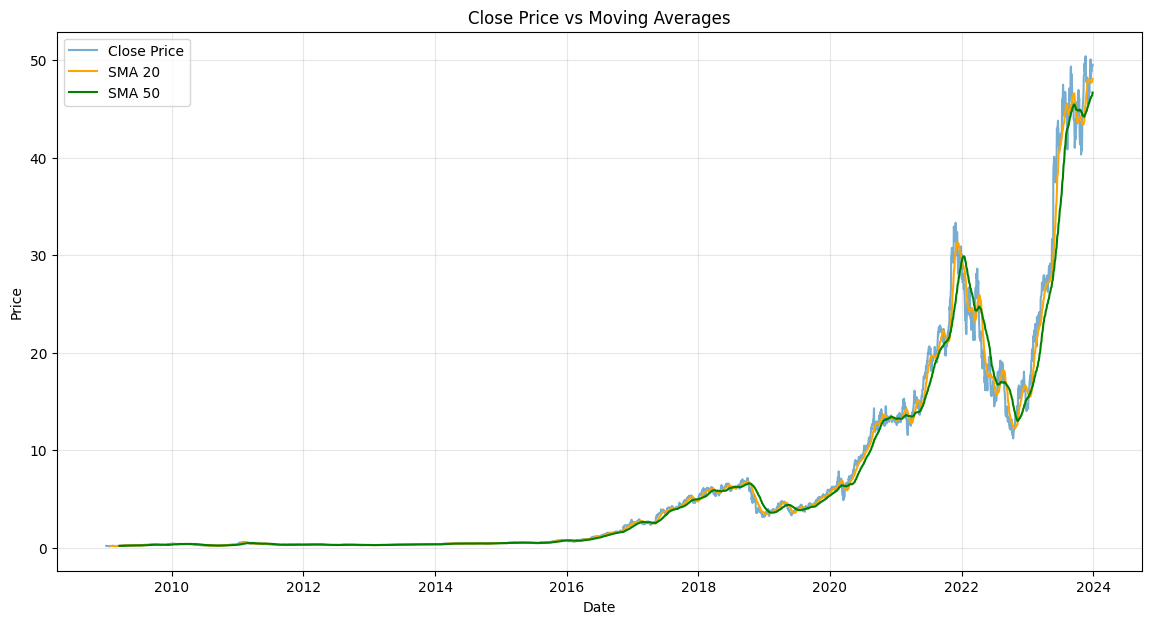

In [5]:
viz = StockVisualizer(df_analyzed)
viz.plot_price_and_ma()

#### B. Momentum (RSI)
This plot helps identify potential reversal points.

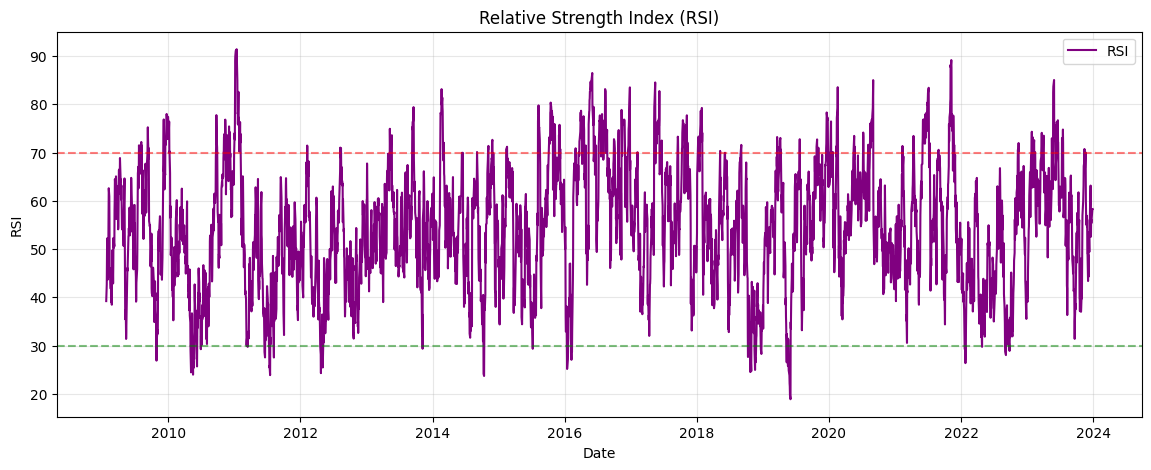

In [6]:
viz.plot_rsi()

#### C. Trend Strength (MACD)
This visualizes the convergence and divergence of the moving averages, providing buy/sell signals.

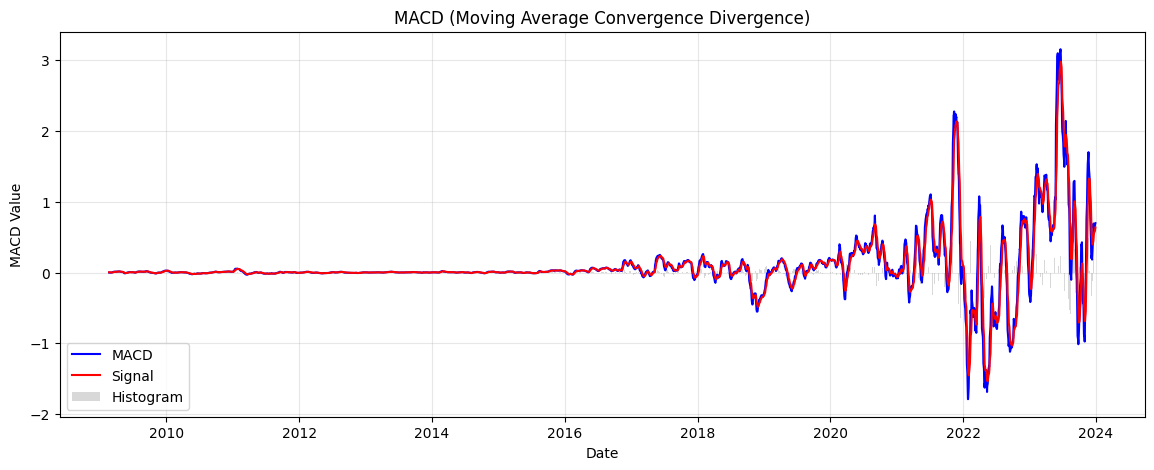

In [7]:
viz.plot_macd()

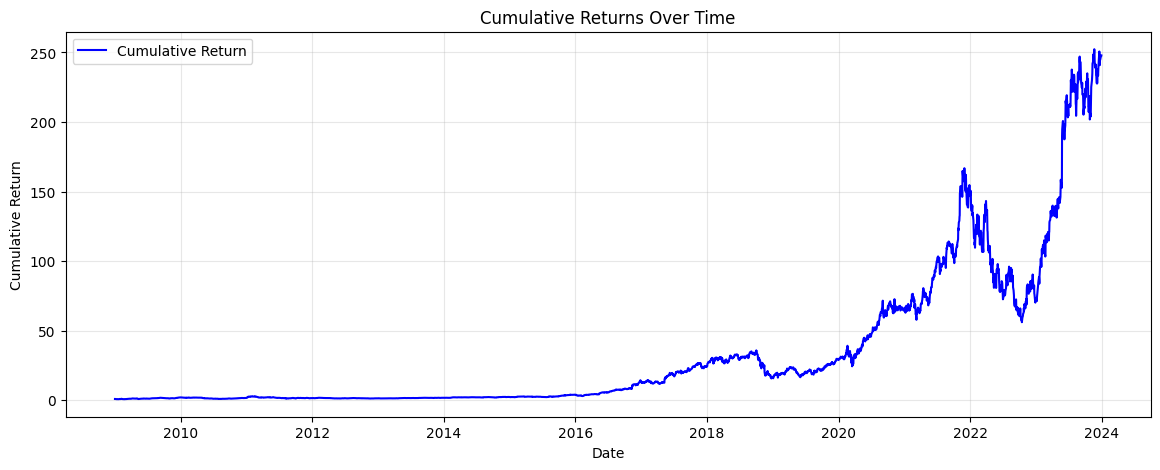

In [8]:
viz.plot_cumulative_returns()

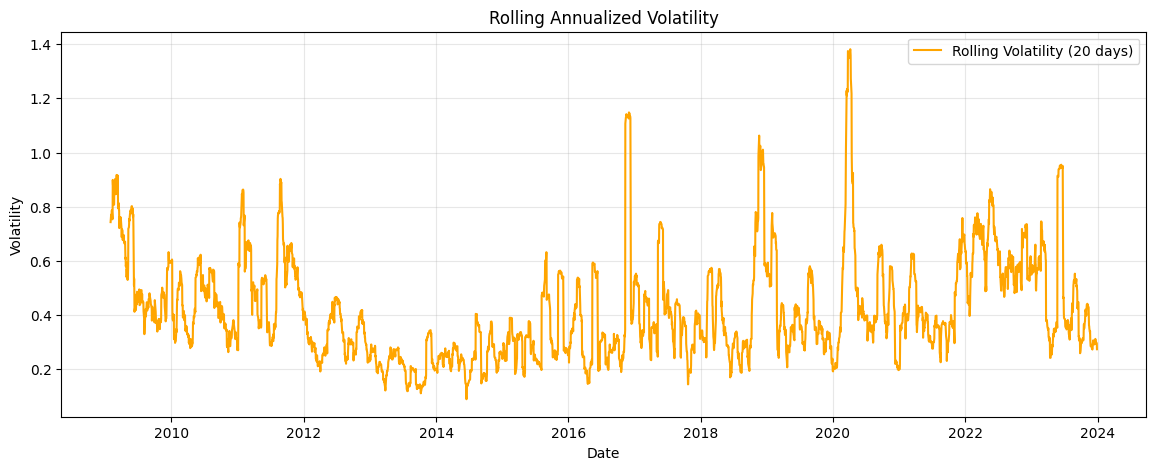

In [9]:
viz.plot_rolling_volatility()